### 로지스틱 회귀
- 선형 모델 기반으로 분류를 해주는 모델
- 종속변수 즉, 타겟이 범주형인 경우에 적용
- 결과를 확률로 변환해서 처리
- 종류
    * 2진 분류 : 타겟의 클래스가 2개
    * 다중분류 : 타겟의 클래스가 3개 이상

In [77]:
# 모듈로딩
import pandas as pd

# 판다스에서 지수표기법(과학적 표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format

# 데이터 준비
DATA_FILE = '../Data/fish.csv'

In [78]:
# CSV ==> DataFrame
fishDF = pd.read_csv(DATA_FILE)
fishDF.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560


In [79]:
# 타겟/종속변수의 클래스 수 => 7개
print(pd.unique(fishDF['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [80]:
# 피쳐 데이터셋 추출
featureDF = fishDF[fishDF.columns[1:]].to_numpy()
print(featureDF[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [81]:
# 타겟 추출
targetSR = fishDF['Species'].to_numpy()
print(targetSR[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


- 학습용 데이터셋 준비 : trainDS, testDS

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify = targetSR,
                                                    random_state = 10)

- 표준화 진행 => 정규분포

In [83]:
from sklearn.preprocessing import StandardScaler

# 학습용(trainDS)기반 스케일러 생성
ss = StandardScaler()
ss.fit(X_train)

# 스케일링 진행
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

- 학습 진행
    * 학습 방법 : 지도학습 > 분류
    * 알고리즘  : 로지스틱 회귀
        * 종속변수 즉, 피쳐에 가중치 곱셈 후 합계 한 결과 >>> 확률값으로 변환

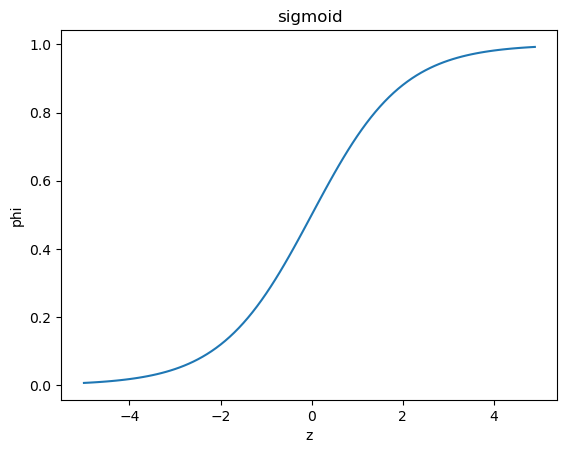

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)

# 선형식의 결괏값 ==> 0.0~1.0 범위의 확률비 값으로 변환
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.title('sigmoid')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [85]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [86]:
# 2진분류 ==> 2개 품종의 데이터셋 추출
mask = (y_train == 'Bream') | (y_train == 'Smelt')

train_bream_smelt = train_scaled[mask]
target_bream_smelt = y_train[mask]

mask2 = (y_test == 'Bream') | (y_test == 'Smelt')
test_bream_smelt = test_scaled[mask2]
test_target_bream_smelt = y_test[mask2]

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [88]:
## 모델 파라미터
print(f"classes_ : {lr.classes_}, {len(lr.classes_)}개")
print(f"n_features_in_ : {lr.n_features_in_}")
print(f"n_iter_ : {lr.n_iter_}")
print(f"coef_ : {lr.coef_}, {len(lr.coef_[0])}개")
print(f"intercept_ : {lr.intercept_}")

classes_ : ['Bream' 'Smelt'], 2개
n_features_in_ : 5
n_iter_ : [13]
coef_ : [[-0.443163 -0.600773 -0.684162 -1.027121 -0.767243]], 5개
intercept_ : [-2.230105]


In [89]:
# 모델의 성능 => train과 test에 대한 점수 즉, 분류의 정확도
train_score = lr.score(train_bream_smelt, target_bream_smelt)
test_score = lr.score(test_bream_smelt, test_target_bream_smelt)

print(f"train_score : {train_score}, test_score : {test_score}")

train_score : 1.0, test_score : 1.0


- 테스팅 진행 => predict(피쳐2D)
    * predict() : 예측 클래스 반환
    * predict_proba() : 각 클래스별 확률값
    * decision_function : 피쳐와 coef_ 곱셈

In [90]:
print(lr.predict(train_bream_smelt[:5]))

['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


In [91]:
print(lr.classes_, lr.predict_proba(train_bream_smelt[:5]), sep = '\n')

['Bream' 'Smelt']
[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]


In [92]:
# y = 'Weight'*coef_[0] + 'Length'*coef_[1] + 'Diagonal'*coef_[2] + 'Height'*coef_[3] + 'Width'*coef_[4]
decision = lr.decision_function(test_bream_smelt[:5])

In [93]:
lr.predict_proba(test_bream_smelt[:1])

array([[0.993216, 0.006784]])

In [94]:
from scipy.special import expit

expit(lr.decision_function(test_bream_smelt[:1]))

array([0.006784])

In [95]:
1/(1+np.exp(-lr.decision_function(test_bream_smelt[:1])))

array([0.006784])